In [56]:
# importing the dependencies
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [57]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

using unigram features

In [58]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [59]:
# loading the cleaned training tweets
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [60]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [61]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [62]:
# checking the shape of the output variable
y.shape

(99989,)

In [63]:
# checking the shape of the input matrix -- this is feed into the classifier for training
X.shape

(99989, 41679)

In [64]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [65]:
model =linear_model.LogisticRegression(C=1,solver ='saga',penalty = 'l2',max_iter = 50000)

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
curr_time = time.time()

Cs = [0.001, 0.01, 0.1, 1, 10]
penalty  = ['l1' , 'l2']
solver= ['liblinear','saga']
param_grid = {'C': Cs, 'solver' :solver, 'penalty' : penalty }

grid_search = GridSearchCV(model, param_grid, cv=4, n_jobs = 4)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)

updated_time = time.time()
time_taken = (updated_time - curr_time)/60
print("time taken for the job: ",time_taken)


In [66]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
# training score
model.score(X_train,y_train)

0.8374192096610868

In [68]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test,y_test)

0.7633763376337633

Confusion matrix, without normalization
[[6015 2767]
 [1965 9251]]
Normalized confusion matrix
[[0.68 0.32]
 [0.18 0.82]]


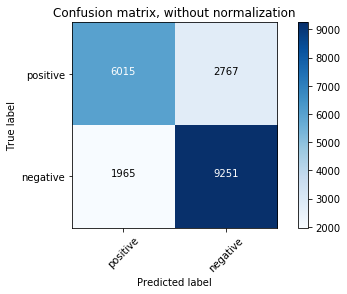

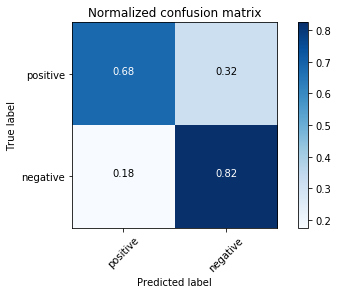

In [69]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [70]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [71]:
X_test=vectorizer.transform(SentimentText)

In [72]:
# checking the shape
X_test.shape

(299989, 41679)

In [73]:
# predicting the sentiments using trained classifier
predicted = model.predict(X_test)

In [74]:
# shape of the predicted 
predicted.shape

(299989,)

In [75]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output.csv', index = False)

using bigrams features

In [76]:
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [77]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [78]:
X=bigram_vectorizer.fit_transform(SentimentText)

In [79]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [80]:
X.shape

(99989, 428766)

In [81]:
y.shape

(99989,)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [83]:
model= linear_model.LogisticRegression(C=1,solver ='saga',penalty = 'l2',max_iter = 50000)

In [84]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
#training score
model.score(X_train,y_train)

0.971646810266155

In [86]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7767276727672767

Confusion matrix, without normalization
[[6220 2562]
 [1903 9313]]
Normalized confusion matrix
[[0.71 0.29]
 [0.17 0.83]]


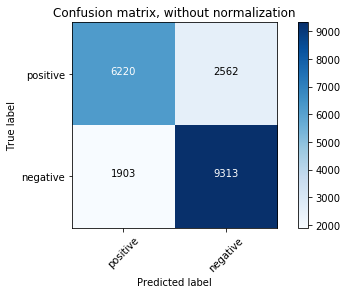

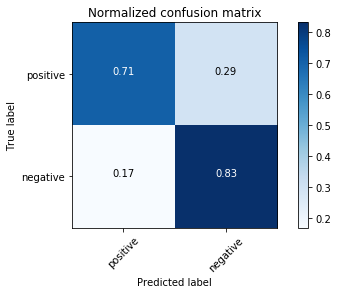

In [87]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [88]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [89]:
X_test=bigram_vectorizer.transform(SentimentText)

In [90]:
X_test.shape

(299989, 428766)

In [91]:
predicted = model.predict(X_test)

In [92]:
predicted.shape

(299989,)

In [93]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output2.csv', index = False)

using both unigrams and bigrams as features set

In [94]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [95]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [96]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)

In [97]:
X_unigrams.shape

(99989, 41679)

In [98]:
X_bigrams.shape

(99989, 428766)

In [99]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams])

In [100]:
X_combined.shape

(99989, 470445)

In [101]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [103]:
model = linear_model.LogisticRegression(C=1,solver ='saga',penalty = 'l2',max_iter = 50000)

In [104]:

model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
#training score
model.score(X_train,y_train)

0.972159367928892

In [106]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7763776377637763

Confusion matrix, without normalization
[[6248 2534]
 [1938 9278]]
Normalized confusion matrix
[[0.71 0.29]
 [0.17 0.83]]


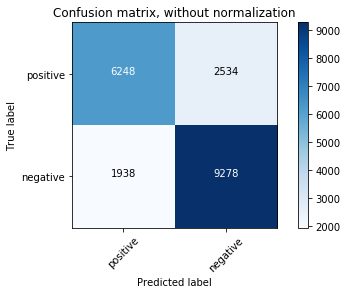

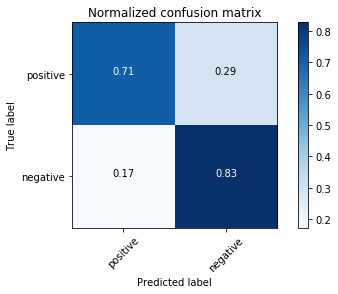

In [107]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [108]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [109]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)

In [110]:
X_test_unigrams.shape

(299989, 41679)

In [111]:
X_test_bigrams.shape

(299989, 428766)

In [112]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [113]:
X_test_combined.shape

(299989, 470445)

In [114]:
predicted = model.predict(X_test_combined)

In [115]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output3.csv', index = False)

using unigrams bigrams and trigrams

In [133]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

# finding the trigram representation
trigram_vectorizer =CountVectorizer(ngram_range=(1,3))

In [134]:
with open('sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [135]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)
X_trigrams = trigram_vectorizer.fit_transform(SentimentText)

In [136]:
X_unigrams.shape

(99989, 41679)

In [137]:
X_bigrams.shape

(99989, 428766)

In [138]:
X_trigrams.shape

(99989, 1178466)

In [139]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams, X_trigrams])

In [140]:
X_combined.shape

(99989, 1648911)

In [141]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [142]:
y.shape

(99989,)

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [144]:
model =  linear_model.LogisticRegression(C=1,solver ='saga',penalty = 'l2',max_iter = 50000)

In [146]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
# training score
model.score(X_train,y_train)

0.990836469102774

In [149]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7788778877887789

Confusion matrix, without normalization
[[6282 2500]
 [1922 9294]]
Normalized confusion matrix
[[0.72 0.28]
 [0.17 0.83]]


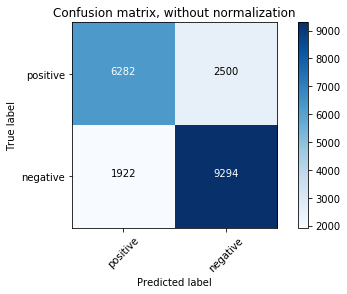

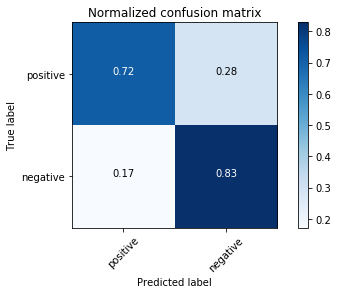

In [150]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [151]:
with open('sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [152]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)
X_test_trigrams = trigram_vectorizer.transform(SentimentText)

In [153]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams,X_test_trigrams])

In [154]:
X_test_combined.shape

(299989, 1648911)

In [155]:
predicted = model.predict(X_test_combined)

In [156]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output4.csv', index = False)